## Практика 7

#### Генерим 21 сигналов (временных рядов), 3 класса по 7 образцов в каждом

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import dtaidistance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [4]:
def pulse(t):
    """Пульс сигнал"""
    return 1 * (abs(t) < 0.5)

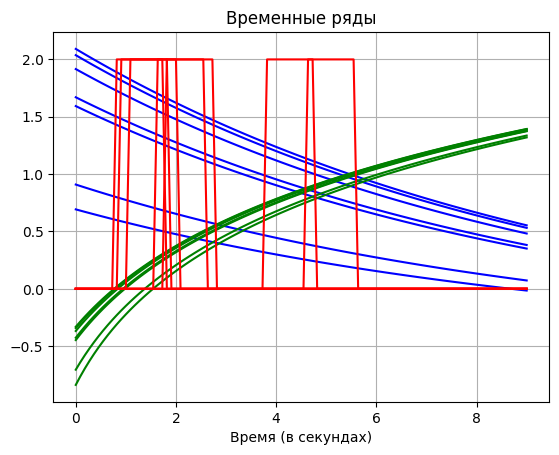

In [5]:
# Индекс и отсчет времени в секундах
time_index = np.linspace(0, 9, 100)

tseries_list = {'Time': time_index}
d = np.random.random(size=10)

N = 7 #количество образцов в каждом типе сигналов

# экспоненциальная функция
for i in range(N):
    tseries_list["Texp"+str(i)]= np.exp(-0.1*time_index + d[i]) - 0.5

# логарифмическая функция
for i in range(N):
    tseries_list["Tlog"+str(i)]= np.log(time_index + d[i] + 1) - 1

# пульс сигнал
for i in range(N):
    tseries_list["Tpulse"+str(i)]= 2*pulse(time_index + 5*d[i] - 6)

# отрисовка всех сигналов
for i in range(N):
    plt.plot(time_index, tseries_list["Texp"+str(i)], '-b')
for i in range(N):
    plt.plot(time_index, tseries_list["Tlog"+str(i)], '-g')
for i in range(N):
    plt.plot(time_index, tseries_list["Tpulse"+str(i)], '-r')
            
plt.title(r'Временные ряды')
plt.xlabel(r'Время (в секундах)')
plt.grid()


#### Расстояние между рядами по формуле Евклида и с помощью DTW

In [15]:
!pip install tslearn

   ---------------------------------------- 0.0/374.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/374.4 kB ? eta -:--:--
   ------ -------------------------------- 61.4/374.4 kB 812.7 kB/s eta 0:00:01
   ------------- -------------------------- 122.9/374.4 kB 1.0 MB/s eta 0:00:01
   ------------------ --------------------- 174.1/374.4 kB 1.0 MB/s eta 0:00:01
   ------------------------ --------------- 225.3/374.4 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 286.7/374.4 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 337.9/374.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 374.4/374.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
    --------------------------------------- 0.0/2.7 MB 991.0 kB/s eta 0:00:03
   - -------------------------------------- 0.1/2.7 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.7 MB 1.1 MB/s eta 0:00:0

In [7]:
def getName(a):
    if a == 0: return "TExp"
    elif a == 1: return "TLog"
    else: return "TPulse"

In [8]:
distList = [[tseries_list["Texp"+str(i)] for i in range(N)], [tseries_list["Tlog"+str(i)] for i in range(N)], [tseries_list["Tpulse"+str(i)] for i in range(N)]]

In [9]:
#Среднее рассторяние между сигналами
print("Среднее расстояние для каждой возможной пары сигналов")

print("\n[EUCLIDEAN]")
for a in range(3):
    for b in range(3):
        ti = 0
        for i in range(N):
            for j in range(N):
                ti += euclidean(distList[a][i], distList[b][j])
        ti /= N**2
        print(f'{getName(a)} & {getName(b)} = {ti}')

print("\n[DTW]")
for a in range(3):
    for b in range(3):
        ti = 0
        for i in range(N):
            for j in range(N):
                ti += dtaidistance.dtw.distance(distList[a][i], distList[b][j])
        ti /= N**2
        print(f'{getName(a)} & {getName(b)} = {ti}')



Среднее расстояние для каждой возможной пары сигналов

[EUCLIDEAN]
TExp & TExp = 3.7711856922277547
TExp & TLog = 9.302274352788181
TExp & TPulse = 9.405451010533634
TLog & TExp = 9.302274352788181
TLog & TLog = 0.7382438573952206
TLog & TPulse = 10.115957652347559
TPulse & TExp = 9.405451010533636
TPulse & TLog = 10.115957652347557
TPulse & TPulse = 6.8473302536808065

[DTW]
TExp & TExp = 2.43942818280339
TExp & TLog = 9.302274352788183
TExp & TPulse = 8.9774081873073
TLog & TExp = 9.302274352788183
TLog & TLog = 0.3037397312078367
TLog & TPulse = 9.763934709095041
TPulse & TExp = 8.9774081873073
TPulse & TLog = 9.76393470909504
TPulse & TPulse = 0.0


DTW лучше справился с задачей обнаружения схожести сигналов, н-р для сигнала TPulse значение равно 0 (против 6.9 у Евклида), а для сигнала TLog зн-е равно 0.2 (против 0.56 у Евклида)

#### Разбиваем набор на train и test

In [22]:
x = []

for key in tseries_list:
    if key != 'Time':
        x.append(tseries_list[key])

# Создание меток классов
labels = np.repeat(np.arange(3), 7)  # Три класса: Texp, Tlog и Tpulse, в каждом по 7 меток

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size=0.3, random_state=0)

#### Обучаем классификаторы KNN с DTW, KNN со стандартной метрикой расстояния, TimeSeriesForest

In [23]:
# Классификатор с использованием DTW
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_dtw.fit(X_train, y_train)

# Классфикатор K-ближайших с использованием Евклидова расстояния
knn_euclidean = KNeighborsClassifier()
knn_euclidean.fit(X_train, y_train)

# Классификатор случайного леса
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_knn_dtw = knn_dtw.predict(X_test)
y_pred_knn_euclidean = knn_euclidean.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Выводим результаты
print("Точность KNN с DTW:", accuracy_score(y_test, y_pred_knn_dtw))
print("Точность KNN с евклидовым расстоянием:", accuracy_score(y_test, y_pred_knn_euclidean))
print("Точность случайного леса:", accuracy_score(y_test, y_pred_rf))

Точность KNN с DTW: 1.0
Точность KNN с евклидовым расстоянием: 0.8571428571428571
Точность случайного леса: 1.0


Метрики KNN с DTW и случайного леса дали отличную точность классификации, метрика KNN с евклидовым расстоянием тоже показала хороший результат, она правильно классифицировала 85.7% тестовых примеров